# Bayes Theorem : https://machinelearningmastery.com/bayes-theorem-for-machine-learning/
## A Gentle Introduction to Bayes Theorem for Machine Learning
### 1. Bayes Theorem of Conditional Probability
- Marginal Probability: The probability of an event irrespective of the outcomes of other random variables, e.g. P(A).
- Joint Probability: Probability of two (or more) simultaneous events, e.g. P(A and B) or P(A, B).
- Conditional Probability: Probability of one (or more) event given the occurrence of another event, e.g. P(A given B) or $P(A | B)$.
    - $P(A, B) = P(A | B) P(B)$
    - $P(A, B) = P(B, A)$
    - $P(A | B) = P(A, B) / P(B)$
    - $P(A | B) != P(B | A)$
- An Alternate Way To Calculate Conditional Probability
    - $P(A|B) = P(B|A) * P(A) / P(B)$
    - $P(B|A) = P(A|B) * P(B) / P(A)$
    - Bayes Theorem: Principled way of calculating a conditional probability without the joint probability.
    - $P(B) = P(B|A) * P(A) + P(B|not A) * P(not A)$
    - $P(A|B) = P(B|A) * P(A) / P(B|A) * P(A) + P(B|not A) * P(not A)$
    - $P(A|B) = P(B|A) * P(A) / (P(B|A) * P(A) + P(B|not A) * P(not A))$
    - Note: the denominator is simply the expansion we gave above.
    - $P(not A) = 1 – P(A)$
    - $P(B|not A) = 1 – P(not B|not A)$
### 2. Naming the Terms in the Theorem
The terms in the Bayes Theorem equation are given names depending on the context where the equation is used.\
It can be helpful to think about the calculation from these different perspectives and help to map your problem onto the equation.
- Firstly, in general, the result P(A|B) is referred to as the posterior probability and P(A) is referred to as the prior probability.
    - P(A|B): Posterior probability.
    - P(A): Prior probability.
- Sometimes P(B|A) is referred to as the likelihood and P(B) is referred to as the evidence.
    - P(B|A): Likelihood.
    - P(B): Evidence.
- This allows Bayes Theorem to be restated as: 
    - Posterior = Likelihood * Prior / Evidence
- What is the probability that there is fire given that there is smoke?
    - Where P(Fire) is the Prior, P(Smoke|Fire) is the Likelihood, and P(Smoke) is the evidence:
        - P(Fire|Smoke) = P(Smoke|Fire) * P(Fire) / P(Smoke)
### 3. Worked Example for Calculating Bayes Theorem
- 1) Diagnostic Test Scenario
- 2) Manual Calculation
- 3) Python Code Calculation : 아래 코드 참고
- 4) Binary Classifier Terminology : 아래 confusion matrix 코드 참고

In [1]:
# calculate the probability of cancer patient and diagnostic test
# calculate P(A|B) given P(A), P(B|A), P(B|not A)
def bayes_theorem(p_a, p_b_given_a, p_b_given_not_a):
	# calculate P(not A)
	not_a = 1 - p_a
	# calculate P(B)
	p_b = p_b_given_a * p_a + p_b_given_not_a * not_a
	# calculate P(A|B)
	p_a_given_b = (p_b_given_a * p_a) / p_b
	return p_a_given_b

# P(A)
p_a = 0.0002
# P(B|A)
p_b_given_a = 0.85
# P(B|not A)
p_b_given_not_a = 0.05
# calculate P(A|B)
result = bayes_theorem(p_a, p_b_given_a, p_b_given_not_a)
# summarize
print('P(A|B) = %.3f%%' % (result * 100))

P(A|B) = 0.339%


In [2]:
# Example of a confusion matrix in Python
from sklearn.metrics import confusion_matrix

expected = [1, 1, 0, 1, 0, 0, 1, 0, 0, 0]
predicted = [1, 0, 0, 1, 0, 0, 1, 1, 1, 0]
results = confusion_matrix(expected, predicted)
print(results)

[[4 2]
 [1 3]]


### 4. Bayes Theorem for Modeling Hypotheses : https://machinelearningmastery.com/what-is-a-hypothesis-in-machine-learning/
### 5. Bayes Theorem for Classification
#### 1) Naive Bayes Classifier
- Worked Example of Naive Bayes : https://machinelearningmastery.com/classification-as-conditional-probability-and-the-naive-bayes-algorithm/

In [3]:
# summarize probability distributions of the dataset
from sklearn.datasets import make_blobs
from scipy.stats import norm
from numpy import mean
from numpy import std

# fit a probability distribution to a univariate data sample
def fit_distribution(data):
	# estimate parameters
	mu = mean(data)
	sigma = std(data)
	print(mu, sigma)
	# fit distribution
	dist = norm(mu, sigma)
	return dist

# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
# sort data into classes
Xy0 = X[y == 0]
Xy1 = X[y == 1]
print(Xy0.shape, Xy1.shape)
# calculate priors
priory0 = len(Xy0) / len(X)
priory1 = len(Xy1) / len(X)
print(priory0, priory1)
# create PDFs for y==0
X1y0 = fit_distribution(Xy0[:, 0])
X2y0 = fit_distribution(Xy0[:, 1])
# create PDFs for y==1
X1y1 = fit_distribution(Xy1[:, 0])
X2y1 = fit_distribution(Xy1[:, 1])

(50, 2) (50, 2)
0.5 0.5
-1.5632888906409914 0.787444265443213
4.426680361487157 0.958296071258367
-9.681177100524485 0.8943078901048118
-3.9713794295185845 0.9308177595208521


In [4]:
# example of preparing and making a prediction with a naive bayes model
from sklearn.datasets import make_blobs
from scipy.stats import norm
from numpy import mean
from numpy import std

# fit a probability distribution to a univariate data sample
def fit_distribution(data):
	# estimate parameters
	mu = mean(data)
	sigma = std(data)
	print(mu, sigma)
	# fit distribution
	dist = norm(mu, sigma)
	return dist

# calculate the independent conditional probability
def probability(X, prior, dist1, dist2):
	return prior * dist1.pdf(X[0]) * dist2.pdf(X[1])

# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
# sort data into classes
Xy0 = X[y == 0]
Xy1 = X[y == 1]
# calculate priors
priory0 = len(Xy0) / len(X)
priory1 = len(Xy1) / len(X)
# create PDFs for y==0
distX1y0 = fit_distribution(Xy0[:, 0])
distX2y0 = fit_distribution(Xy0[:, 1])
# create PDFs for y==1
distX1y1 = fit_distribution(Xy1[:, 0])
distX2y1 = fit_distribution(Xy1[:, 1])
# classify one example
Xsample, ysample = X[0], y[0]
py0 = probability(Xsample, priory0, distX1y0, distX2y0)
py1 = probability(Xsample, priory1, distX1y1, distX2y1)
print('P(y=0 | %s) = %.3f' % (Xsample, py0*100))
print('P(y=1 | %s) = %.3f' % (Xsample, py1*100))
print('Truth: y=%d' % ysample)

-1.5632888906409914 0.787444265443213
4.426680361487157 0.958296071258367
-9.681177100524485 0.8943078901048118
-3.9713794295185845 0.9308177595208521
P(y=0 | [-0.79415228  2.10495117]) = 0.348
P(y=1 | [-0.79415228  2.10495117]) = 0.000
Truth: y=0


In [5]:
# example of gaussian naive bayes
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
# define the model
model = GaussianNB()
# fit the model
model.fit(X, y)
# select a single sample
Xsample, ysample = [X[0]], y[0]
# make a probabilistic prediction
yhat_prob = model.predict_proba(Xsample)
print('Predicted Probabilities: ', yhat_prob)
# make a classification prediction
yhat_class = model.predict(Xsample)
print('Predicted Class: ', yhat_class)
print('Truth: y=%d' % ysample)

Predicted Probabilities:  [[1.00000000e+00 5.52387327e-30]]
Predicted Class:  [0]
Truth: y=0


#### 2) Bayes Optimal Classifier
- https://machinelearningmastery.com/bayes-optimal-classifier/
- How to Perform Bayesian Optimization : https://machinelearningmastery.com/what-is-bayesian-optimization/ 
    - test problem : code 1 참고
    - Surrogate Function : code 2
    - Acquisition Function : code 3
    - Complete Bayesian Optimization Algorithm : code 4 
    - Hyperparameter Tuning With Bayesian Optimization : code 5 

### 6. More Uses of Bayes Theorem in Machine Learning
#### 1) Bayesian Optimization : same 2)

Optima: x=0.900, y=0.810


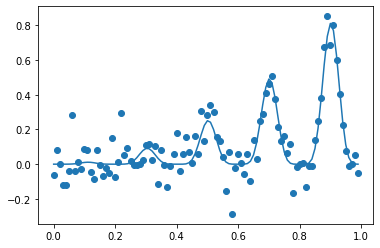

In [6]:
# code 1
# example of the test problem
from math import sin
from math import pi
from numpy import arange
from numpy import argmax
from numpy.random import normal
from matplotlib import pyplot

# objective function
def objective(x, noise=0.1):
	noise = normal(loc=0, scale=noise)
	return (x**2 * sin(5 * pi * x)**6.0) + noise

# grid-based sample of the domain [0,1]
X = arange(0, 1, 0.01)
# sample the domain without noise
y = [objective(x, 0) for x in X]
# sample the domain with noise
ynoise = [objective(x) for x in X]
# find best result
ix = argmax(y)
print('Optima: x=%.3f, y=%.3f' % (X[ix], y[ix]))
# plot the points with noise
pyplot.scatter(X, ynoise)
# plot the points without noise
pyplot.plot(X, y)
# show the plot
pyplot.show()

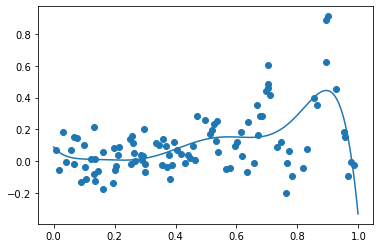

In [7]:
# code 2
# example of a gaussian process surrogate function
from math import sin
from math import pi
from numpy import arange
from numpy import asarray
from numpy.random import normal
from numpy.random import random
from matplotlib import pyplot
from warnings import catch_warnings
from warnings import simplefilter
from sklearn.gaussian_process import GaussianProcessRegressor

# objective function
def objective(x, noise=0.1):
	noise = normal(loc=0, scale=noise)
	return (x**2 * sin(5 * pi * x)**6.0) + noise

# surrogate or approximation for the objective function
def surrogate(model, X):
	# catch any warning generated when making a prediction
	with catch_warnings():
		# ignore generated warnings
		simplefilter("ignore")
		return model.predict(X, return_std=True)

# plot real observations vs surrogate function
def plot(X, y, model):
	# scatter plot of inputs and real objective function
	pyplot.scatter(X, y)
	# line plot of surrogate function across domain
	Xsamples = asarray(arange(0, 1, 0.001))
	Xsamples = Xsamples.reshape(len(Xsamples), 1)
	ysamples, _ = surrogate(model, Xsamples)
	pyplot.plot(Xsamples, ysamples)
	# show the plot
	pyplot.show()

# sample the domain sparsely with noise
X = random(100)
y = asarray([objective(x) for x in X])
# reshape into rows and cols
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)
# define the model
model = GaussianProcessRegressor()
# fit the model
model.fit(X, y)
# plot the surrogate function
plot(X, y, model)

In [8]:
# code 3
# probability of improvement acquisition function
def acquisition(X, Xsamples, model):
	# calculate the best surrogate score found so far
	yhat, _ = surrogate(model, X)
	best = max(yhat)
	# calculate mean and stdev via surrogate function
	mu, std = surrogate(model, Xsamples)
	mu = mu[:, 0]
	# calculate the probability of improvement
	probs = norm.cdf((mu - best) / (std+1E-9))
	return probs

# optimize the acquisition function
def opt_acquisition(X, y, model):
	# random search, generate random samples
	Xsamples = random(100)
	Xsamples = Xsamples.reshape(len(Xsamples), 1)
	# calculate the acquisition function for each sample
	scores = acquisition(X, Xsamples, model)
	# locate the index of the largest scores
	ix = argmax(scores)
	return Xsamples[ix, 0]

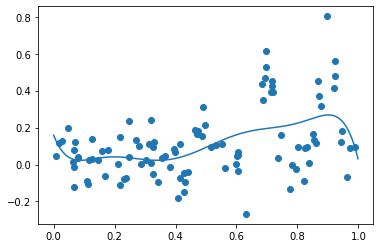

>x=0.771, f()=0.212578, actual=0.039
>x=0.679, f()=0.184597, actual=0.388
>x=0.907, f()=0.264939, actual=0.816
>x=0.736, f()=0.196775, actual=0.161
>x=0.907, f()=0.310641, actual=0.749
>x=0.911, f()=0.344063, actual=0.589
>x=0.420, f()=0.046500, actual=-0.038
>x=0.623, f()=0.170403, actual=-0.158
>x=0.909, f()=0.363018, actual=0.878
>x=0.800, f()=0.242552, actual=-0.083
>x=0.177, f()=0.044629, actual=-0.131
>x=0.916, f()=0.393442, actual=0.740
>x=0.914, f()=0.415662, actual=0.800
>x=0.895, f()=0.425005, actual=0.859
>x=0.252, f()=0.018391, actual=-0.144
>x=0.489, f()=0.104001, actual=0.199
>x=0.913, f()=0.462027, actual=0.851
>x=0.806, f()=0.254736, actual=-0.108
>x=0.870, f()=0.407024, actual=0.401
>x=0.916, f()=0.479828, actual=0.567
>x=0.072, f()=0.026435, actual=0.142
>x=0.745, f()=0.142447, actual=0.126
>x=0.915, f()=0.484279, actual=0.727
>x=0.943, f()=0.454133, actual=0.187
>x=0.348, f()=0.004929, actual=0.008
>x=0.474, f()=0.103939, actual=0.131
>x=0.916, f()=0.484446, actual=0

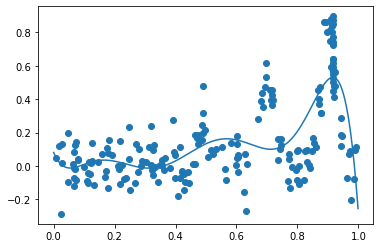

Best Result: x=0.916, y=0.896


In [9]:
# code 4
# example of bayesian optimization for a 1d function from scratch
from math import sin
from math import pi
from numpy import arange
from numpy import vstack
from numpy import argmax
from numpy import asarray
from numpy.random import normal
from numpy.random import random
from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor
from warnings import catch_warnings
from warnings import simplefilter
from matplotlib import pyplot

# objective function
def objective(x, noise=0.1):
	noise = normal(loc=0, scale=noise)
	return (x**2 * sin(5 * pi * x)**6.0) + noise

# surrogate or approximation for the objective function
def surrogate(model, X):
	# catch any warning generated when making a prediction
	with catch_warnings():
		# ignore generated warnings
		simplefilter("ignore")
		return model.predict(X, return_std=True)

# probability of improvement acquisition function
def acquisition(X, Xsamples, model):
	# calculate the best surrogate score found so far
	yhat, _ = surrogate(model, X)
	best = max(yhat)
	# calculate mean and stdev via surrogate function
	mu, std = surrogate(model, Xsamples)
	mu = mu[:, 0]
	# calculate the probability of improvement
	probs = norm.cdf((mu - best) / (std+1E-9))
	return probs

# optimize the acquisition function
def opt_acquisition(X, y, model):
	# random search, generate random samples
	Xsamples = random(100)
	Xsamples = Xsamples.reshape(len(Xsamples), 1)
	# calculate the acquisition function for each sample
	scores = acquisition(X, Xsamples, model)
	# locate the index of the largest scores
	ix = argmax(scores)
	return Xsamples[ix, 0]

# plot real observations vs surrogate function
def plot(X, y, model):
	# scatter plot of inputs and real objective function
	pyplot.scatter(X, y)
	# line plot of surrogate function across domain
	Xsamples = asarray(arange(0, 1, 0.001))
	Xsamples = Xsamples.reshape(len(Xsamples), 1)
	ysamples, _ = surrogate(model, Xsamples)
	pyplot.plot(Xsamples, ysamples)
	# show the plot
	pyplot.show()

# sample the domain sparsely with noise
X = random(100)
y = asarray([objective(x) for x in X])
# reshape into rows and cols
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)
# define the model
model = GaussianProcessRegressor()
# fit the model
model.fit(X, y)
# plot before hand
plot(X, y, model)
# perform the optimization process
for i in range(100):
	# select the next point to sample
	x = opt_acquisition(X, y, model)
	# sample the point
	actual = objective(x)
	# summarize the finding
	est, _ = surrogate(model, [[x]])
	print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
	# add the data to the dataset
	X = vstack((X, [[x]]))
	y = vstack((y, [[actual]]))
	# update the model
	model.fit(X, y)

# plot all samples and the final surrogate function
plot(X, y, model)
# best result
ix = argmax(y)
print('Best Result: x=%.3f, y=%.3f' % (X[ix], y[ix]))

In [10]:
# !pip install scikit-optimize

In [11]:
# code 5 
# example of bayesian optimization with scikit-optimize
from numpy import mean
from sklearn.datasets import make_blobs
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from skopt.space import Integer
from skopt.utils import use_named_args
from skopt import gp_minimize

# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers=3, n_features=2)
# define the model
model = KNeighborsClassifier()
# define the space of hyperparameters to search
search_space = [Integer(1, 5, name='n_neighbors'), Integer(1, 2, name='p')]

# define the function used to evaluate a given configuration
@use_named_args(search_space)
def evaluate_model(**params):
	# something
	model.set_params(**params)
	# calculate 5-fold cross validation
	result = cross_val_score(model, X, y, cv=5, n_jobs=-1, scoring='accuracy')
	# calculate the mean of the scores
	estimate = mean(result)
	return 1.0 - estimate

# perform optimization
result = gp_minimize(evaluate_model, search_space)
# summarizing finding:
print('Best Accuracy: %.3f' % (1.0 - result.fun))
print('Best Parameters: n_neighbors=%d, p=%d' % (result.x[0], result.x[1]))

c:\Users\yang.yoonjeong\anaconda3\envs\tf\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\yang.yoonjeong\anaconda3\envs\tf\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\yang.yoonjeong\anaconda3\envs\tf\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\yang.yoonjeong\anaconda3\envs\tf\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\yang.yoonjeong\anaconda3\envs\tf\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at t

Best Accuracy: 0.748
Best Parameters: n_neighbors=5, p=1


#### 2) Bayesian Belief Networks : https://machinelearningmastery.com/introduction-to-bayesian-belief-networks/